In [1]:
#Get live data from Website
from bs4 import BeautifulSoup
import lxml
import requests
import urllib.request

#Data Processing
import pandas as pd

#data Visualization
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import chart_studio
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

#For Map Visualization
import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

## Get Live Data from website

In [3]:
demo = urllib.request.urlopen('https://www.mygov.in/corona-data/covid19-statewise-status')
soup = BeautifulSoup(demo,"lxml")

## Get Time of Retrive a data

In [4]:
tabledata = soup.find('div', class_='content clearfix')
time = tabledata.find('div', class_='field-item')
print('The Covid-19 data updated on',time.text)

The Covid-19 data updated on 21 April 2020, 08:00 GMT+5:30


### Create a list to Store a data

In [5]:
State_Name = ['demo']
Total_confirmed = ['demo']
Cured = ['demo']
Death = ['demo']

## Save data in List

In [6]:
for con in tabledata.find_all('div', class_='content'):
    
    item1 = con.find('div', class_='field field-name-field-select-state field-type-list-text field-label-above')
    data_state = item1.find('div', class_='field-items')
    State_Name.append(data_state.text)


    item2 = con.find('div', 
                     class_='field field-name-field-total-confirmed-indians field-type-number-integer field-label-above')
    data_cases = item2.find('div', class_='field-items')
    Total_confirmed.append(data_cases.text)


    item3 = con.find('div', 
                     class_='field field-name-field-cured field-type-number-integer field-label-above')
    data_cured = item3.find('div', class_='field-items')
    Cured.append(data_cured.text)


    item4 = con.find('div', 
                     class_='field field-name-field-deaths field-type-number-integer field-label-above')
    data_death = item4.find('div', class_='field-items')
    Death.append(data_death.text)

## Create a DataFrame form list

In [7]:
Data_table = {'STATE NAME':State_Name, 'TOTAL CONFIRMED':Total_confirmed, 'CURED/DISCHARGED/MIGRATED':Cured,
             'DEATH':Death}

In [8]:
covid_india = pd.DataFrame(Data_table)

In [9]:
covid_india = covid_india.drop(0)
covid_india = covid_india.reset_index(drop=True)

In [10]:
covid_india.dtypes

STATE NAME                   object
TOTAL CONFIRMED              object
CURED/DISCHARGED/MIGRATED    object
DEATH                        object
dtype: object

In [11]:
covid_india['TOTAL CONFIRMED'] = covid_india['TOTAL CONFIRMED'].astype(int)
covid_india['CURED/DISCHARGED/MIGRATED'] = covid_india['CURED/DISCHARGED/MIGRATED'].astype(int)
covid_india['DEATH'] = covid_india['DEATH'].astype(int)

In [12]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH
0,AndhraPradesh,722,92,20
1,AndamanNicobar,16,11,0
2,Bihar,113,42,2
3,Chandigarh,26,13,0
4,Chhattisgarh,36,25,0


In [13]:
covid_india['ACTIVE CASES'] = covid_india['TOTAL CONFIRMED'] - covid_india['CURED/DISCHARGED/MIGRATED'] - covid_india['DEATH']

In [14]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,722,92,20,610
1,AndamanNicobar,16,11,0,5
2,Bihar,113,42,2,69
3,Chandigarh,26,13,0,13
4,Chhattisgarh,36,25,0,11


## Analysis Data in Numerical Format

In [15]:
covid_india.style.background_gradient(cmap = 'Reds')

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,722,92,20,610
1,AndamanNicobar,16,11,0,5
2,Bihar,113,42,2,69
3,Chandigarh,26,13,0,13
4,Chhattisgarh,36,25,0,11
5,Delhi,2081,431,47,1603
6,Goa,7,7,0,0
7,Gujarat,1939,131,71,1737
8,Haryana,254,127,3,124
9,HimachalPradesh,39,16,1,22


In [16]:
total_active = covid_india.groupby('STATE NAME')['TOTAL CONFIRMED'].sum().sort_values(ascending = False).to_frame()

total_active.head()

,TOTAL CONFIRMED
STATE NAME,
Maharashtra,4666
Delhi,2081
Gujarat,1939
Rajasthan,1576
TamilNadu,1520


In [17]:
total_active.style.background_gradient(cmap = 'Reds')

,TOTAL CONFIRMED
STATE NAME,
Maharashtra,4666
Delhi,2081
Gujarat,1939
Rajasthan,1576
TamilNadu,1520
MP,1485
UttarPradesh,1184
Telengana,873
AndhraPradesh,722


## Analysis Data in Graph Format

In [18]:
covid_india.iplot(kind='bar',x='STATE NAME',y='TOTAL CONFIRMED',
                  title='State wise Covid-19 Cases',xTitle='State',yTitle='Total Cases')

In [19]:
fig=px.bar(covid_india,x="STATE NAME",y="TOTAL CONFIRMED",color='TOTAL CONFIRMED',title='Total cases in India')
fig.show()

In [20]:
fig=px.bar(covid_india,x="STATE NAME",y="DEATH",color='DEATH',title='Total Death in India')
fig.show()

In [21]:
fig=px.bar(covid_india,x="STATE NAME",y="CURED/DISCHARGED/MIGRATED",color='CURED/DISCHARGED/MIGRATED',
           title='Total Cases Close in India')
fig.show()

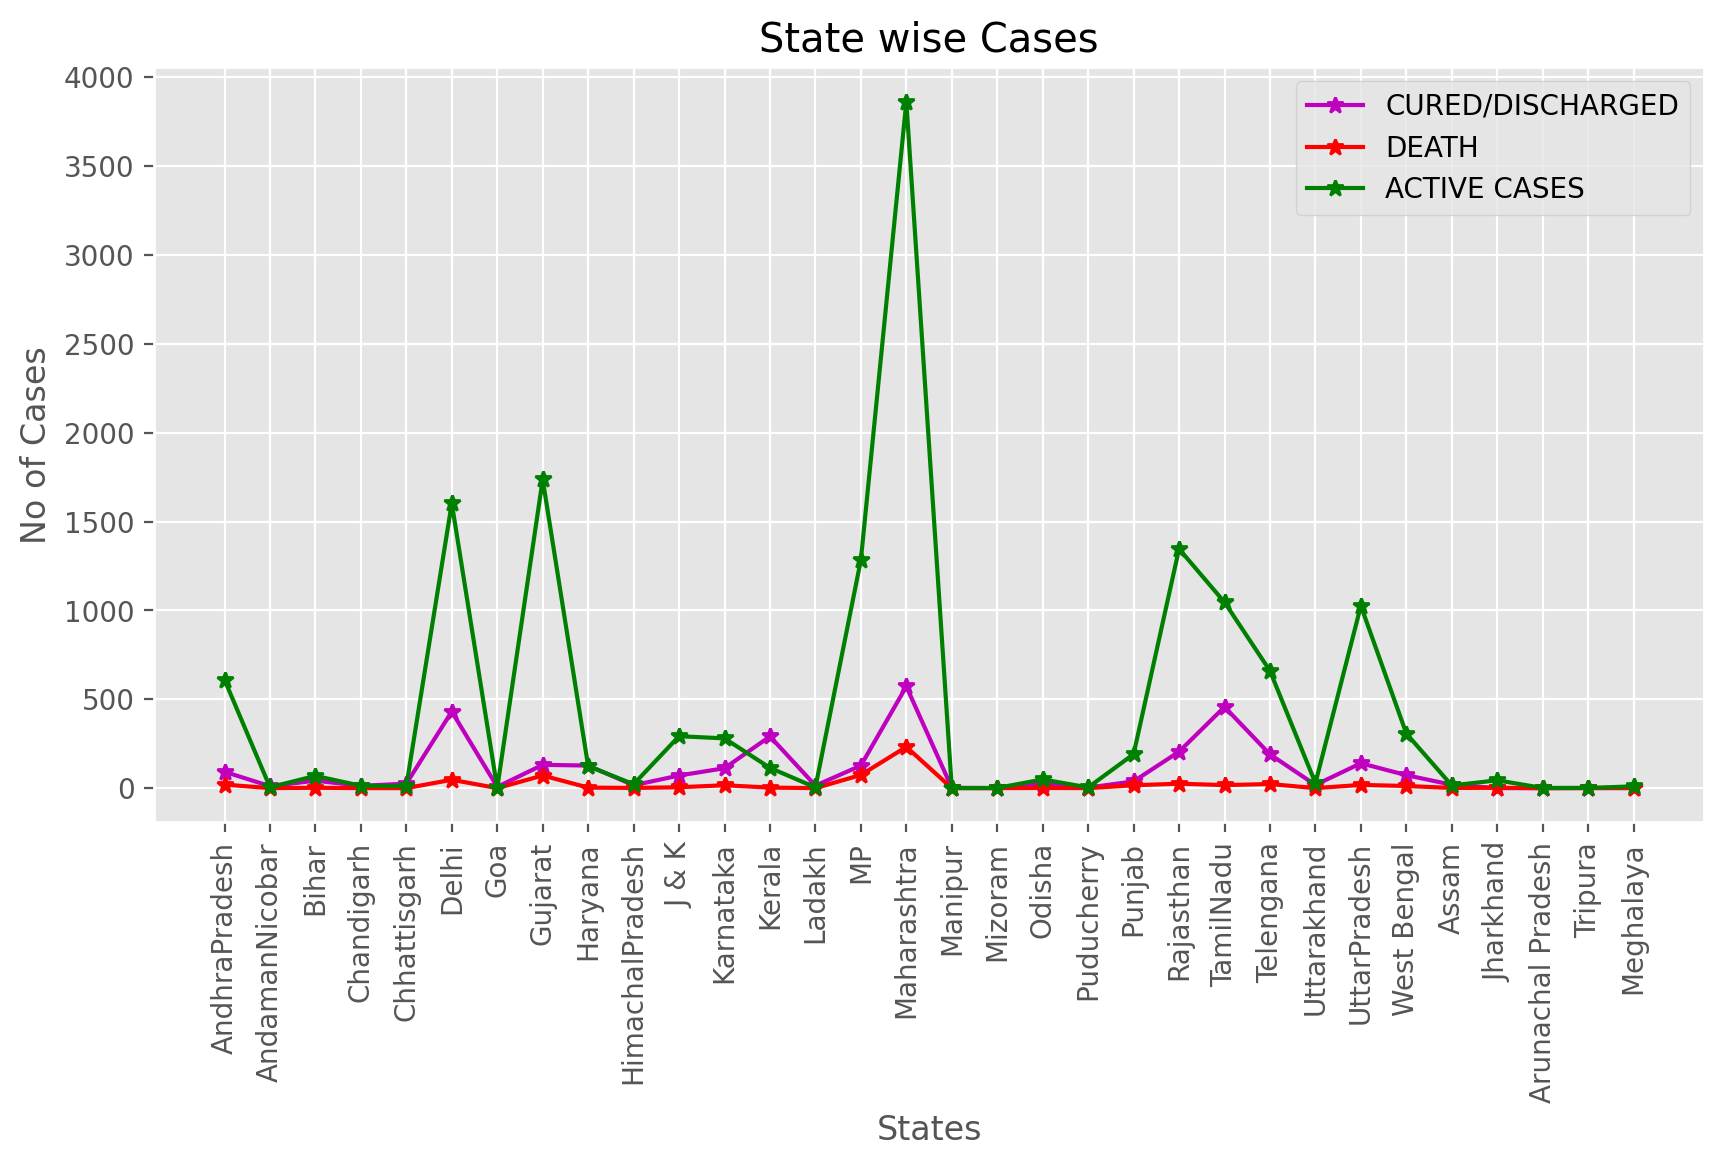

In [22]:
plt.figure(figsize=(10,5),dpi=200)

#plt.plot(covid_india['STATE NAME'], covid_india['TOTAL CONFIRMED'], label='Math marks', color='r')
plt.plot(covid_india['STATE NAME'], covid_india['CURED/DISCHARGED/MIGRATED'], label='CURED/DISCHARGED',marker='*', color='m')
plt.plot(covid_india['STATE NAME'], covid_india['DEATH'],marker='*', label='DEATH', color='r')
plt.plot(covid_india['STATE NAME'], covid_india['ACTIVE CASES'],marker='*', label='ACTIVE CASES', color='g')

plt.xticks(covid_india['STATE NAME'], rotation=90)
plt.xlabel('States')
plt.ylabel('No of Cases')
plt.title('State wise Cases')

plt.legend()
plt.show()



### Insert a Latitude and Longitude in main DataFrame

In [23]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,722,92,20,610
1,AndamanNicobar,16,11,0,5
2,Bihar,113,42,2,69
3,Chandigarh,26,13,0,13
4,Chhattisgarh,36,25,0,11


In [24]:
map_data = pd.read_csv('Indian Coordinates.csv')

In [25]:
map_data.head()

,STATE NAME,Latitude,Longitude
0,AndamanNicobar,11.667026,92.735983
1,AndhraPradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [26]:
covid_india = pd.merge(covid_india, map_data, on='STATE NAME')

In [27]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES,Latitude,Longitude
0,AndhraPradesh,722,92,20,610,14.750429,78.570026
1,AndamanNicobar,16,11,0,5,11.667026,92.735983
2,Bihar,113,42,2,69,25.785414,87.479973
3,Chandigarh,26,13,0,13,30.719997,76.780006
4,Chhattisgarh,36,25,0,11,22.090420,82.159987


## Analysis Data in Map Format

In [28]:
#folium.Map()

In [33]:
map1 = folium.Map(location=[25,80],zoom_start=4.5,tiles='openstreetmap')

for lat,long,value,name in zip(covid_india['Latitude'],covid_india['Longitude'],
                                covid_india['TOTAL CONFIRMED'],covid_india['STATE NAME']):
   
    folium.CircleMarker([lat,long],radius=value*0.01,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: '+ str(value)+ '<br>'),
                        color='red',fill_color='red',fill_opacity=0.1).add_to(map1)
    

In [34]:
map1